# Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import missingno as msno

# Loading the data
df = pd.read_csv('Cleaned_datasets/Combined_CleanData_V2.csv')

### Approaches to deal with outliers 🧐
For handling outliers there are 5 different approaches which we can use and these are
1. **Trimming**: Trimming outliers means removing them from the dataset. However, it's important to note that trimming can also lead to a lot of data loss in case there are a lot of outliers in our dataset.
2. **Capping**: Capping, also known as **Winsorizing**, involves setting a limit or threshold value and them replacing any value lying outside of that threshold value with that threshold value. Capping helps in reducing the impact of outliers but if there are a lot of outliers than it may change the distribution of the feature.
3. **Discretization**: In this technique we convert a numerical feature to categorical feature by creating bins and by creating bins we force the outliers to behave like other set of data points in that bin.
4. **Treating them as missing values:** In this technique we consider outliers and missing values and treat them accordingly.
5. **Mathematical transformation:**

### Ways to access potential outliers 🧲

Now before using any of the above mentioned approach we first need to identify outliers and then decide whether they are actually outliers, or they are some data points which are representing some hidden information in our dataset. Just like there are various approaches for dealing with outliers there are also some couple of ways to detect outliers and extract outliers. 
1. **Z-Score method**: This is used when the feature we are focusing on is having normal or sort of normal distribution. The way this technique works is that we simply convert the feature values into the z score and then extract those values which are more than 3 or less than -3, because these data points could be potential outliers.
2. **IQR Method**: This method is used when we have some skewness in our feature. Using this method we can find the lower limit and upper limit utilizing the IQR and Q1 or Q3 value.

In [2]:
# First we will only be considering the numerical features
df.select_dtypes(exclude = 'object').sample(3)

,price,Price_Per_SQFT,Area,bedRoom,bathroom,floorNum,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1986,1.80,7758.0,2320,3.0,3.0,0,NaN,NaN,2320.0,0,0,0,1,0,1,0.0
217,0.78,6024.0,1294,2.0,2.0,0,1295.0,NaN,NaN,0,0,0,0,1,2,23.0
332,1.80,9473.0,1900,3.0,3.0,9,1900.0,NaN,NaN,0,0,0,0,0,2,84.0


`Note`: Since we know that for the detection of outliers we can either use the statistical measures and visualization. So in our case to get more better understanding we will be using visualization graphs and plots. We will first plot the histogram for all the numerical features to see the distribution of the feature and then use appropriate technique to access and analyze outliers.

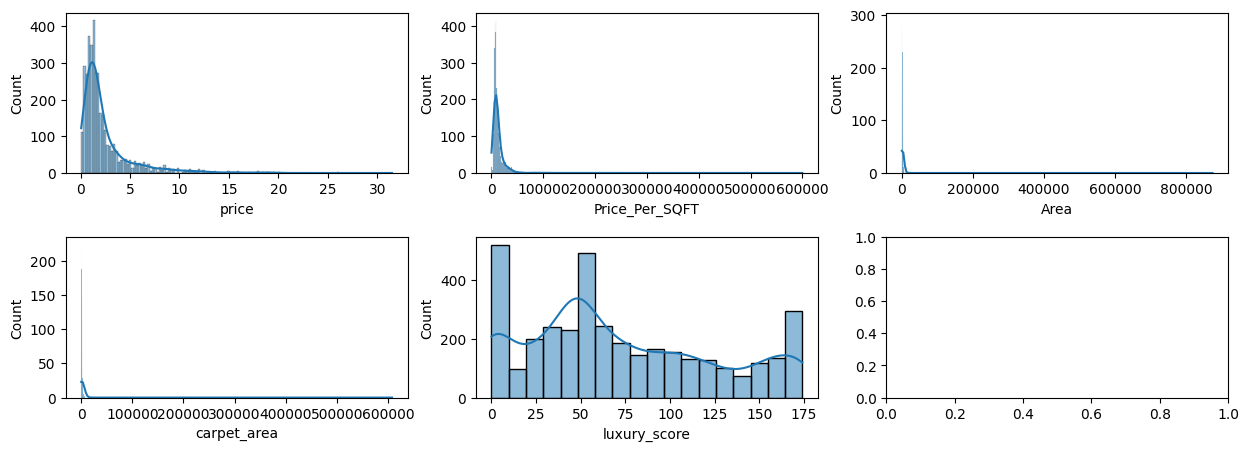

In [3]:
# Plotting histograms 
fig,ax = plt.subplots(2,3,figsize=(15,5))

sns.histplot(data=df['price'],kde=True,ax = ax[0][0])
sns.histplot(data=df['Price_Per_SQFT'],kde=True,ax = ax[0][1])
sns.histplot(data=df['Area'],kde=True,ax = ax[0][2])

sns.histplot(data=df['carpet_area'],kde=True,ax = ax[1][0])
sns.histplot(data=df['luxury_score'],kde=True,ax = ax[1][1])

plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.show()

Since all the numerical features are having strong skewness in their distribution so we will be using the IQR method to access the outlier data points.

In [4]:
def find_limit(series):
    """
    Input: Pandas series
    Output: List containing upper limit and lower limit
    """

    # Finding the q1 and q3 value to find the IQR
    q1_value = series.quantile(0.25)
    q3_value = series.quantile(0.75)
    IQR = q3_value-q1_value
    Upper_lmt = q3_value+1.5*IQR
    Lower_lmt = q1_value-1.5*IQR
    return [Upper_lmt,Lower_lmt]

### Outlier detection and removal : `price`

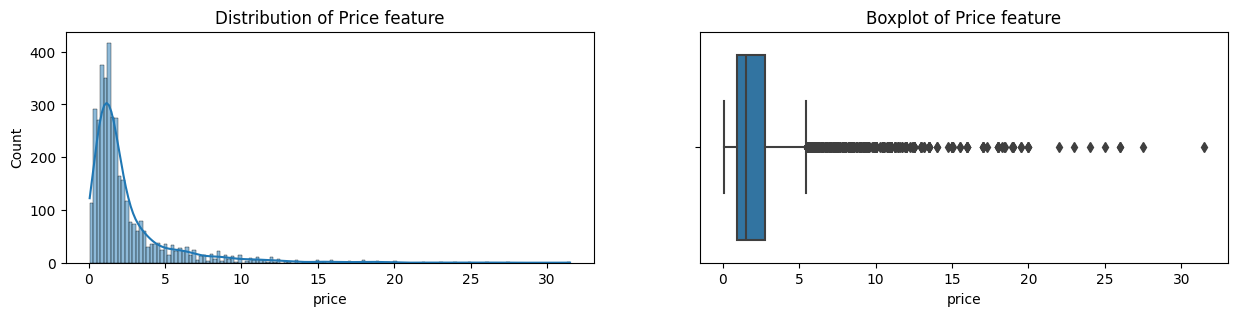

In [5]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['price'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of Price feature")

sns.boxplot(x = df['price'],ax = ax[1])
ax[1].set_title("Boxplot of Price feature")
plt.show()

In [6]:
Up_lmt,Lw_lmt = find_limit(df['price'])
Price_outliers = df[(df['price']<Lw_lmt) | (df['price']>Up_lmt)]
Price_outliers.shape

(426, 26)

**Observations about `price` feature**
- The price feature is not having outiers, instead above 15 crores all the property are independent_houses due to which their price is more than flats and this is also true as a fact. So we can say all independent_house data points above 15 crores can be treated as collective outliers and should not be removed.
- Since above 20 Crores there are only few properties (8) so we will simply trim the data points having more than 20 Cr price

In [7]:
# Let's check the range of flats price
print(df[df['Property_Type'] == 'flat']['price'].describe())
#Price_outliers[Price_outliers['price']>15]

count    2938.000000
mean        1.703615
std         1.363912
min         0.160000
25%         0.900000
50%         1.370000
75%         2.030000
max        15.000000
Name: price, dtype: float64


In [8]:
# Removing data points having more than 20 crore price
df = df[df['price']<20.0]

### Outliers detection and removal: `Price_Per_SQFT` 

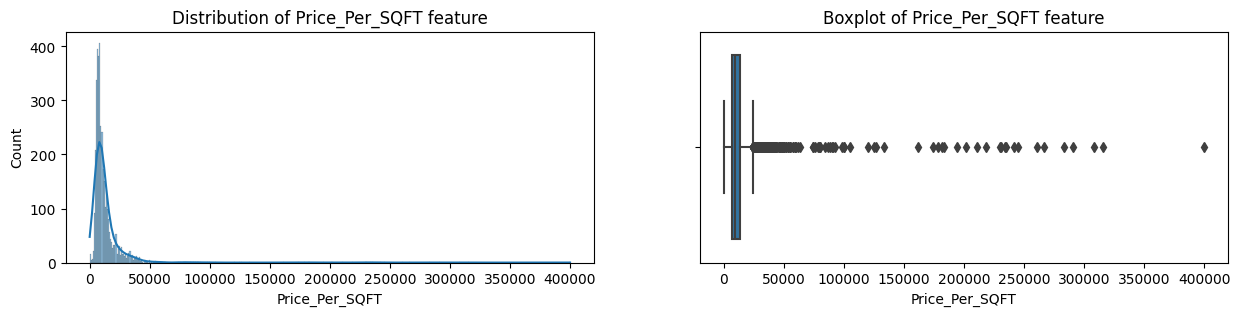

In [9]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['Price_Per_SQFT'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of Price_Per_SQFT feature")

sns.boxplot(x = df['Price_Per_SQFT'],ax = ax[1])
ax[1].set_title("Boxplot of Price_Per_SQFT feature")
plt.show()

In [10]:
Up_lmt,Lw_lmt = find_limit(df['Price_Per_SQFT'])

Outliers_pps = df[(df['Price_Per_SQFT']<Lw_lmt) | (df['Price_Per_SQFT']>Up_lmt)]
Outliers_pps.shape

(351, 26)

**Observations about `Price_Per_SQFT` feature**
- Out of flats and independent houses, most of properties are IH
- Out of all the outlier data points we will see that there are certain properties which are having Area less than 1000 and these are actually in term of square yards. So we will simply need to multiply them by 9 and then use them to recalculate the Price_Per_SQFT.

In [11]:
Outliers_pps.loc[:,'Area'] = Outliers_pps['Area'].apply(lambda x:x*9 if x<1000 else x)
Outliers_pps.loc[:,'Price_Per_SQFT'] = round((Outliers_pps['price']*10000000)/Outliers_pps['Area'])

# Updating the values
df.update(Outliers_pps)

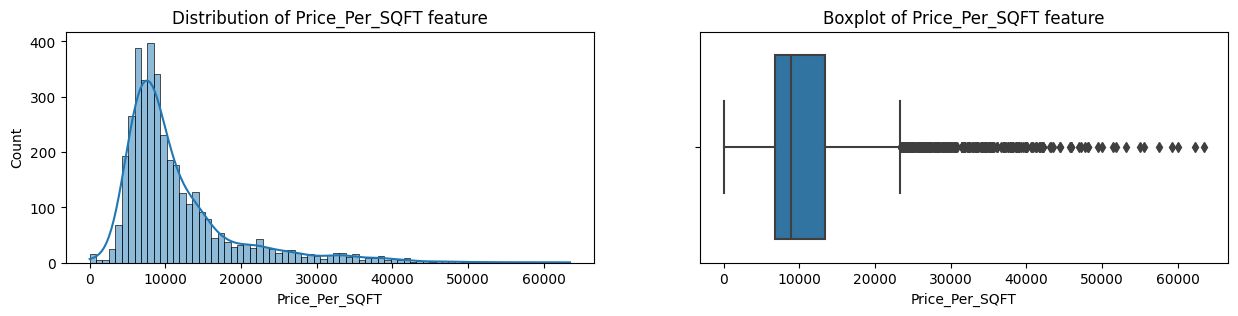

In [12]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['Price_Per_SQFT'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of Price_Per_SQFT feature")

sns.boxplot(x = df['Price_Per_SQFT'],ax = ax[1])
ax[1].set_title("Boxplot of Price_Per_SQFT feature")
plt.show()

### Outliers detection and removal: `Area` 

In [13]:
df['Area'].describe()

count      3785.000000
mean       2886.434082
std       22781.786321
min         145.000000
25%        1259.000000
50%        1741.000000
75%        2320.000000
max      875000.000000
Name: Area, dtype: float64

In [14]:
# Trimming outliers
df = df[df['Area'] < 10000]

In [15]:
Up_lmt,Lw_lmt = find_limit(df['Area'])

Area_outliers = df[(df['Area']<Lw_lmt) | (df['Area']>Up_lmt)]
Area_outliers.shape

(213, 26)

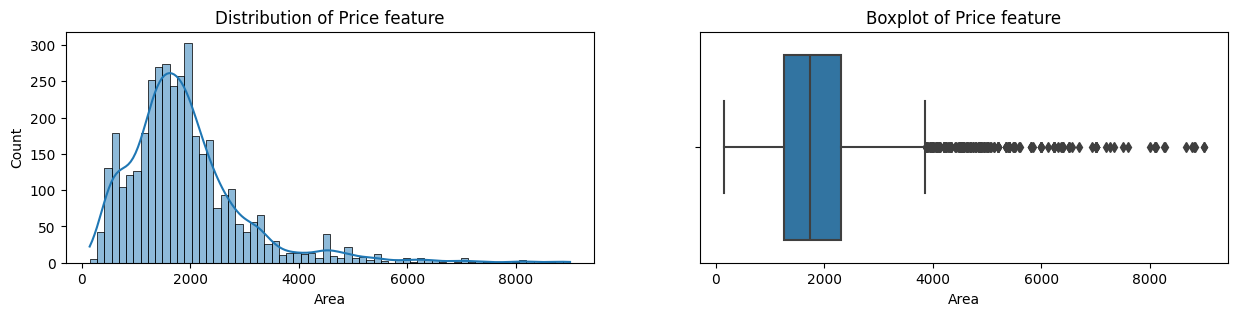

In [16]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['Area'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of Price feature")

sns.boxplot(x = df['Area'],ax = ax[1])
ax[1].set_title("Boxplot of Price feature")
plt.show()

### Outliers detection and removal: `bedRoom,bathroom and floorNum` 

In [17]:
# Value counts for the bedRooms
df['bedRoom'].value_counts(ascending=True)

bedRoom
20.0       1
14.0       1
21.0       1
11.0       1
18.0       2
19.0       2
13.0       4
16.0       9
10.0      18
7.0       26
12.0      28
8.0       29
9.0       39
6.0       71
1.0      127
5.0      208
4.0      668
2.0      983
3.0     1539
Name: count, dtype: int64

In [18]:
# Trimming data points having more than 15 bedRooms
df = df[df['bedRoom']<15]

In [19]:
# Value counts for the bathroom
df['bathroom'].value_counts()

bathroom
3.0     1108
2.0     1094
4.0      833
5.0      294
1.0      157
6.0      117
7.0       37
9.0       36
8.0       25
12.0      22
10.0       8
13.0       4
11.0       4
14.0       2
16.0       1
Name: count, dtype: int64

In [20]:
# Trimming data point having 16 bathroom for 12 bedroom
df.drop(df[df['bathroom'] == 16.0].index,inplace=True)

In [21]:
# Value counts for the floorNum
df['floorNum'].value_counts(ascending=True)

floorNum
 51      1
 44      1
 45      1
 38      1
 34      2
 43      2
 32      2
 40      2
 39      2
 35      2
-1       3
 29      3
 28      4
 33      4
 31      4
 26      5
 30      5
 27      8
 25      9
 24     11
 23     14
 22     14
 21     16
 20     26
 19     34
 18     37
 13     41
 17     50
 16     52
 15     83
 11    116
 14    120
 0     132
 12    160
 9     169
 5     175
 7     183
 10    184
 6     185
 8     196
 4     309
 1     356
 2     500
 3     517
Name: count, dtype: int64

### Outliers detection and removal: `luxury_score` 

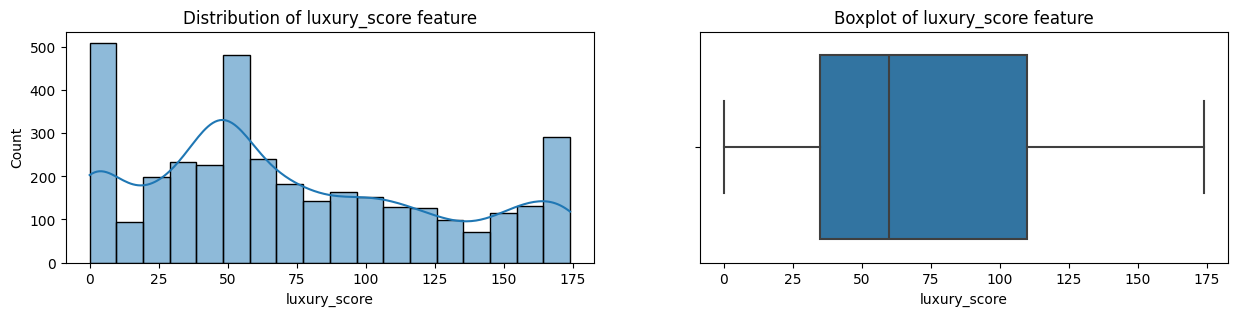

In [22]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['luxury_score'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of luxury_score feature")

sns.boxplot(x = df['luxury_score'],ax = ax[1])
ax[1].set_title("Boxplot of luxury_score feature")
plt.show()

### Outliers detection and removal: `Super built up area, Built up area and Carpet Area` 

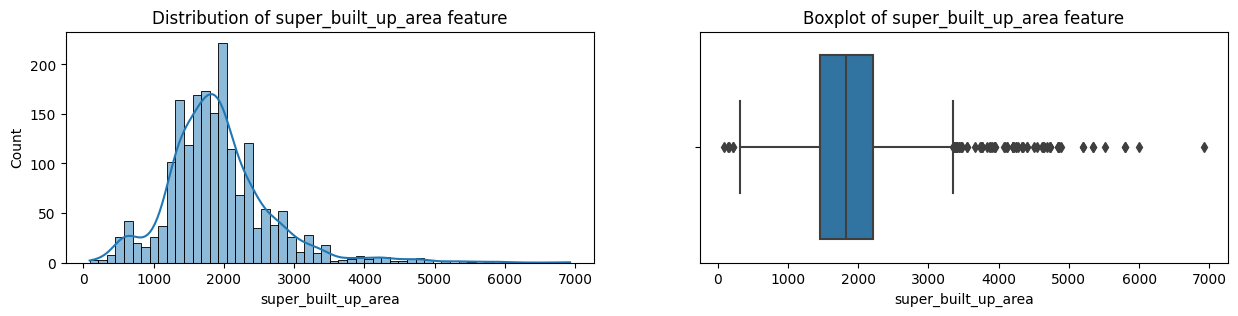

In [23]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['super_built_up_area'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of super_built_up_area feature")

sns.boxplot(x = df['super_built_up_area'],ax = ax[1])
ax[1].set_title("Boxplot of super_built_up_area feature")
plt.show()

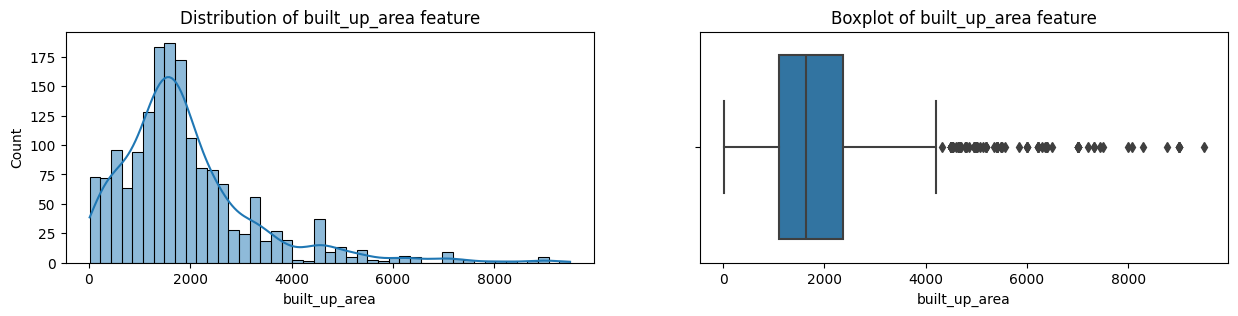

In [24]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['built_up_area'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of built_up_area feature")

sns.boxplot(x = df['built_up_area'],ax = ax[1])
ax[1].set_title("Boxplot of built_up_area feature")
plt.show()

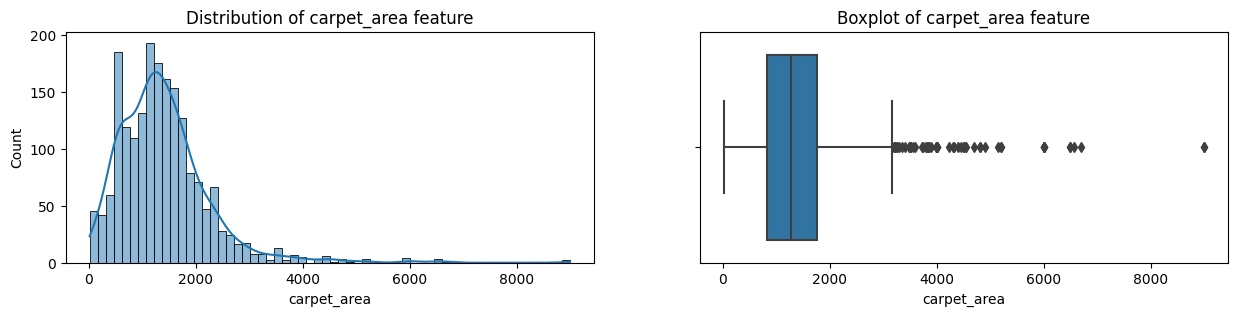

In [25]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['carpet_area'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of carpet_area feature")

sns.boxplot(x = df['carpet_area'],ax = ax[1])
ax[1].set_title("Boxplot of carpet_area feature")
plt.show()

In [26]:
# Creating a feature called Area per bedrooms
df['Area_Per_BRoom'] = df['Area']/df['bedRoom']

In [27]:
df['Area_Per_BRoom'].describe()

count    3741.000000
mean      604.667376
std       275.644095
min        41.250000
25%       458.333333
50%       600.000000
75%       710.750000
max      3801.000000
Name: Area_Per_BRoom, dtype: float64

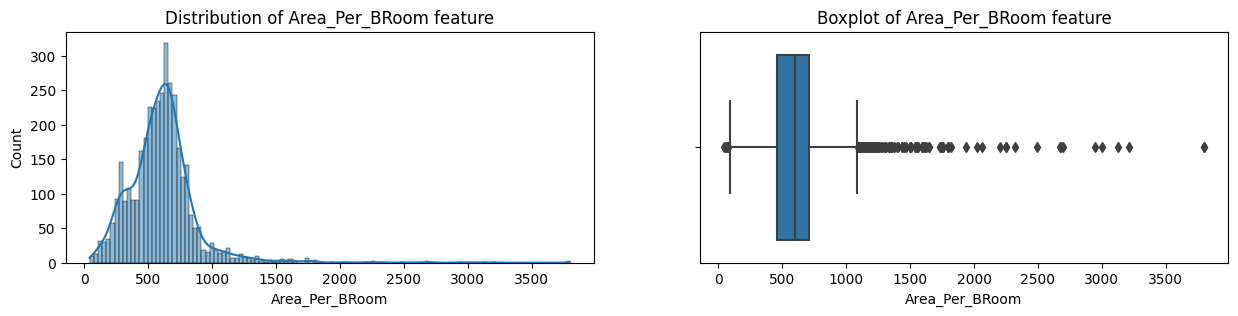

In [28]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['Area_Per_BRoom'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of Area_Per_BRoom feature")

sns.boxplot(x = df['Area_Per_BRoom'],ax = ax[1])
ax[1].set_title("Boxplot of Area_Per_BRoom feature")
plt.show()

In [29]:
Up_lmt,Lw_lmt = find_limit(df['Area_Per_BRoom'])

Area_PerBR_outliers = df[(df['Area_Per_BRoom']<Lw_lmt) | (df['Area_Per_BRoom']>Up_lmt)]
Area_PerBR_outliers.shape

(149, 27)

In [30]:
df[df['Area_Per_BRoom'] < df['Area_Per_BRoom'].quantile(0.05)][['bedRoom','Area_Per_BRoom','Property_Type']]

,bedRoom,Area_Per_BRoom,Property_Type
116,3.0,189.000000,flat
198,2.0,235.500000,flat
334,2.0,228.500000,flat
703,3.0,215.000000,flat
704,3.0,215.000000,flat
...,...,...,...
3770,9.0,165.888889,Independent_house
3773,12.0,161.250000,Independent_house
3775,12.0,150.750000,Independent_house
3776,9.0,125.000000,Independent_house


In [31]:
df[df['Area_Per_BRoom'] < df['Area_Per_BRoom'].quantile(0.05)][['bedRoom','Area_Per_BRoom','Property_Type']]['Property_Type'].value_counts()

Property_Type
Independent_house    156
flat                  31
Name: count, dtype: int64

Since most of the properties are Independent houses thus we can assume that there are 2 Storey or 3 Storey houses.

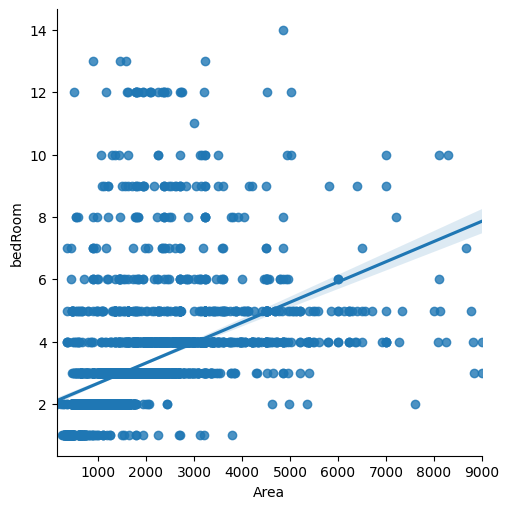

In [32]:
# To understand the relationship between ARea and bedRoom we can use scatter plot but lmplot also gives us regressionl line
sns.lmplot(data=df, x="Area", y="bedRoom")

From the lmplot we can clearly see that there are few data points which are potnetial outliers because normally the number of bedRooms should increase as per increase in Area but there are few properties where the number of bedRooms are so large for small Area

In [33]:
# Removing properties having Area per bedroom less than 100
df = df[df['Area_Per_BRoom']>100]

In [34]:
df[(df['Area_Per_BRoom'] < 250) & (df['bedRoom'] > 3)]['Property_Type'].value_counts()

Property_Type
Independent_house    111
Name: count, dtype: int64

In [35]:
# Dividing rooms with number of floor as an assumption that houses have multiple storeys
Area_PerBR_outliers = df[(df['Area_Per_BRoom'] < 250) & (df['bedRoom'] > 3)]
Area_PerBR_outliers.loc[:, 'bedRoom'] = round(Area_PerBR_outliers['bedRoom'] / Area_PerBR_outliers['floorNum'])

# Updating the values
df.update(Area_PerBR_outliers)

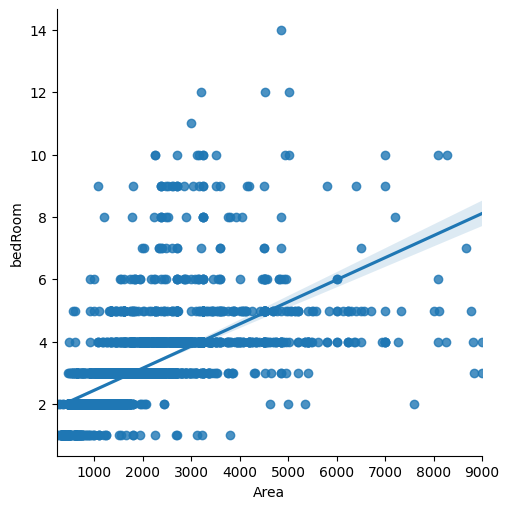

In [36]:
sns.lmplot(data=df, x="Area", y="bedRoom")

# Handling Missing values

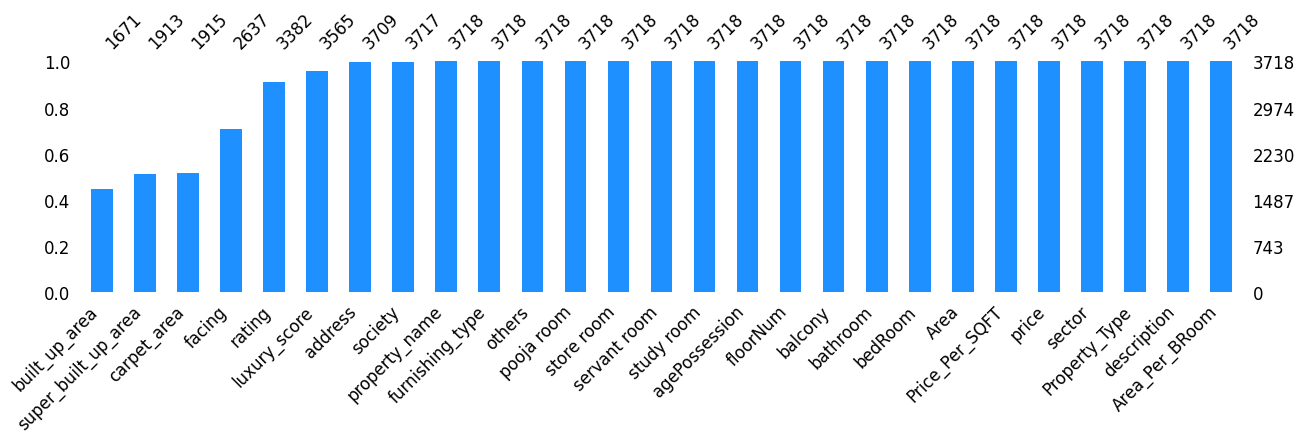

In [37]:
# Visualize missing values using a bar chart
msno.bar(df, figsize=(15, 3), color="dodgerblue", sort="ascending", fontsize=12)
plt.show()

In [38]:
df.isnull().mean()*100

property_name           0.000000
Property_Type           0.000000
society                 0.026896
sector                  0.000000
price                   0.000000
Price_Per_SQFT          0.000000
Area                    0.000000
bedRoom                 0.000000
bathroom                0.000000
balcony                 0.000000
address                 0.242066
floorNum                0.000000
facing                 29.074771
agePossession           0.000000
description             0.000000
rating                  9.037117
super_built_up_area    48.547606
built_up_area          55.056482
carpet_area            48.493814
study room              0.000000
servant room            0.000000
store room              0.000000
pooja room              0.000000
others                  0.000000
furnishing_type         0.000000
luxury_score            4.115116
Area_Per_BRoom          0.000000
dtype: float64

In [39]:
# Let's first extract features having percentage of missing values less than 5%
Less_than5_NaN = [cols for cols in df.columns if df[cols].isnull().mean() * 100 < 5 and df[cols].isnull().mean() * 100 > 0]
Less_than5_NaN

['society', 'address', 'luxury_score']

In [40]:
# Imputing the missing value with mean and mode value
for cols in Less_than5_NaN:
    if cols == 'luxury_score':
        df[cols].fillna(df[cols].mean(),inplace=True)
    else:
        df[cols].fillna(df[cols].mode()[0],inplace=True)


- Carpet area is the net usable area of a property, excluding the thickness of the external walls, balcony, terrace, and common areas.
- Built-up area is the sum of the carpet area and the area of the external and internal walls, balcony, terrace, and staircase.
- Super built-up area is the sum of the built-up area and the common areas, such as lifts, corridors, staircases, clubhouse, and other amenities.

Super built-up area > Built-up area > Carpet area

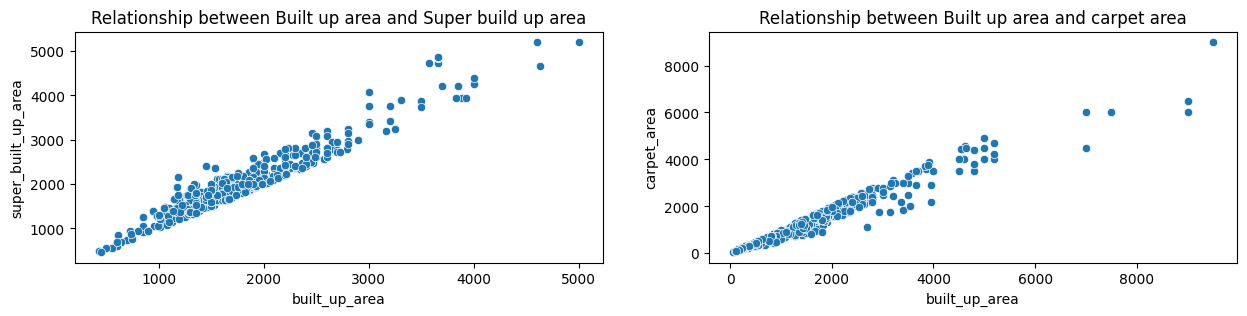

In [41]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.scatterplot(data = df,x='built_up_area',y='super_built_up_area',ax = ax[0])
ax[0].set_title("Relationship between Built up area and Super build up area")

sns.scatterplot(data = df,x='built_up_area',y='carpet_area',ax = ax[1])
ax[1].set_title("Relationship between Built up area and carpet area")
plt.show()

It is possible to find the value of built-up area using super built-up area if you know the ratio of super built-up area to built-up area because the ratio represents the proportion of the super built-up area that is made up of built-up area.

For example, if the ratio of super built-up area to built-up area is 1.25, this means that 1.25 square feet of super built-up area is equal to 1 square foot of built-up area. Therefore, if you know the super built-up area of a property, you can divide it by 1.25 to find the built-up area.

In [42]:
All_Areas_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]
All_Areas_df.shape

(534, 27)

In [43]:
Super_to_built_ratio = (All_Areas_df['super_built_up_area']/All_Areas_df['built_up_area']).median()
Carpet_to_built_ratio = (All_Areas_df['carpet_area']/All_Areas_df['built_up_area']).median()

Super_to_built_ratio = np.round(Super_to_built_ratio,3)
Carpet_to_built_ratio = np.round(Carpet_to_built_ratio,3)

print(Super_to_built_ratio,Carpet_to_built_ratio)

1.105 0.9


Now we have the ratios, so we can fill up the built up area values but since super built up and carpet area values are also missing so we need to careful about such data points. We will consider data points in the below mentioned manner
- Both super and carpet are present but built up is missing : sc_df
- Only super built up area is present : s_df
- Only carpet area is present : c_df

In [46]:
# Create three DataFrames with different combinations of missing values
sc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
s_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

# Fill in the missing values in the `built_up_area` column
sc_df.loc[:, 'built_up_area'].fillna(round(((sc_df['super_built_up_area']/1.105) + (sc_df['carpet_area']/0.9))/2),inplace=True)
s_df.loc[:, 'built_up_area'].fillna(round(s_df['super_built_up_area']/1.105),inplace=True)
c_df.loc[:, 'built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

# Update the original DataFrame
df.update(sc_df.loc[:, 'built_up_area'])
df.update(s_df.loc[:, 'built_up_area'])
df.update(c_df.loc[:, 'built_up_area'])

<Axes: xlabel='built_up_area', ylabel='price'>

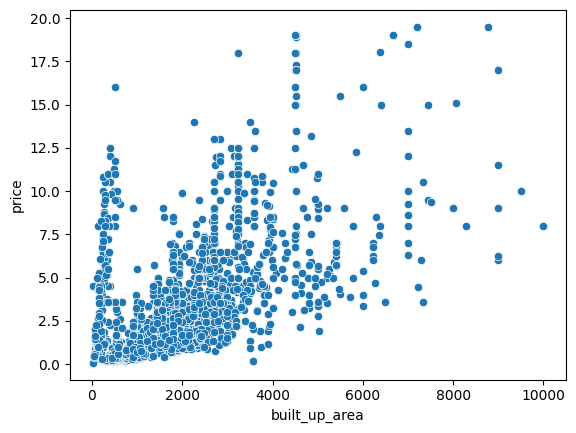

In [48]:
# Let's see built up area after imputing 
sns.scatterplot(data = df,x = 'built_up_area',y = 'price')

In [51]:
# Extracting data points with built up area less than 2000 but price more than 2.5 cr
Check_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','Area','built_up_area']]
Check_df.sample(4)

,price,Area,built_up_area
3646,16.0,4235,500.00
2358,3.5,1350,1500.00
3307,6.5,3239,360.00
714,2.6,2441,1939.03


Since the Area is justifying the price but Built_Up_Area is not so we will simply fill the built_up_area with correpsonding area values

In [53]:
Check_df['built_up_area'] = Check_df['Area']
df.update(Check_df)

In [71]:
# Fixing the undefined value in the Age possesion feature
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['Property_Type'] == row['Property_Type'])]['agePossession'].mode()[0]
        if mode_value == 'Undefined':
            # Find mode value based on same property type
            mode_value = df[(df['Property_Type'] == row['Property_Type'])]['agePossession'].mode()[0]
            return mode_value
        else:
            return mode_value
    else:
        return row['agePossession']

df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [74]:
# Dropping the features which are not useful further
df.drop(columns=['Area','super_built_up_area','carpet_area','Area_Per_BRoom','rating','facing'],inplace=True)

In [78]:
df.to_csv('Cleaned_datasets/Combined_CleanData_V3.csv',index=False)